# FGV MBA: Business Analytics & Big Data <a href="https://colab.research.google.com/github/ldaniel/Advanced-Statistical-Modelling/blob/master/notebooks/group/FGV-MBA-MEA_Trabalho-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" title="Open this notebook in Google Colab" alt="Open this notebook in Google Colab"/></a>
## Modelagem Estatística Avançada
**Professor:** Rodrigo Marotti Togneri
<br />
**Data**: Janeiro de 2020
<br />
**Título**: Trabalho em Grupo de EDA (Exploratory Data Analysis)
<br />
**Alunos**:

|Github|Nome|Matrícula|E-mail|
|---|---|---|---|
|<a href="https://github.com/DanielFCampos"><img src="https://avatars2.githubusercontent.com/u/31582602?s=460&v=4" title="DanielFCampos" width="40" height="40"></a>|Daniel Campos|A57635769|[daniel.ferraz.campos@gmail.com](daniel.ferraz.campos@gmail.com)|
|<a href="https://github.com/ldaniel"><img src="https://avatars2.githubusercontent.com/u/205534?s=460&v=4" title="ldaniel" width="40" height="40"></a>|Leandro Daniel|A57622988|[contato@leandrodaniel.com](contato@leandrodaniel.com)|
|<a href="https://github.com/RodriGonca"><img src="https://avatars2.githubusercontent.com/u/50252438?s=460&v=4" title="RodriGonca" width="40" height="40"></a>|Rodrigo Goncalves|A57566093|[rodrigo.goncalves@me.com](rodrigo.goncalves@me.com)|
|<a href="https://github.com/ygorlima1"><img src="https://avatars2.githubusercontent.com/u/52429828?s=460&v=4" title="ygorlima1" width="40" height="40"></a>|Ygor Lima|A57549661|[ygor_redesocial@hotmail.com](ygor_redesocial@hotmail.com)|

***

# Enunciado do Trabalho em Grupo de EDA (Exploratory Data Analysis)
Escolha um dentre os seguintes datasets:
- Gas Prices in Brazil 2004-2019 (compartilhado em sala de aula)
- Outro da preferência do grupo. <p>

Para o dataset escolhido, deve-se:

1. **[CONTEXTO](#contexto):** Contextualizar brevemente os dados (de que tratam os dados? 1 parágrafo entre 5 e 10 linhas). <p>
2. **[QUESTÕES DE NEGÓCIO](#questoes_negocio):** Estabelecer uma questão relevante a ser respondida. <p>
3. **[MONTAGEM DE DATASET](#montagem_dataset):** Montar o(s) dataset(s) final(is) para responder as questões. <p>
4. **[CARACTERIZAÇÃO DE DATASETS](#caracterizacao_datasets):** Caracterizar as colunas (nome, tipo, significado). <p>
5. **[VISUALIZAÇÃO E DISCUSSÃO](#visualizacao_discussao):** <p>
<p> a.	Gerar plots que permitam tirar conclusões claras dos dados (a questão deve ser suficientemente complexa para que exija minimamente dois gráficos distintos complementares). <p>
<p> b.	Os gráficos devem ser interpretados e discutidos, e as conclusões acerca dos mesmos e das questões de negócio devem ser apresentadas <p>
6. **[CONCLUSÕES](#conclusoes):** Relembrar a questão levantada e sumarizar as conclusões obtidas.
<p><p>
O trabalho deverá ser desenvolvido em Jupyter notebook e deverá ser entregue na data combinada com o professor em formato .ipynb já rodado e com outputs salvos no arquivo entregue. Organize o documento de modo que ele esteja dividido nas 6 seções propostas acima.

***

# Imports e setup inicial

As seguintes bibliotecas serão usadas para o desenvolvimento deste trabalho:

- **pandas**, para manipulação e análise de dados;
- **numpy**, para realizar cálculos em arrays multidimensionais e outros cálculos numéricos;
- **matplotlib**, para a visualização de dados;
- **seaborn**, atua em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada;
- **sys**, para obter algumas informações básicas do Python;
- **InteractiveShell**, será feita uma configuração do kernel para indicar ao Jupyter quais *nodes* devem ser executados interativamente, exibindo a saída das expressões.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [82]:
from IPython.core.interactiveshell import InteractiveShell

# kernel option to make jupyter do this for any variable or statement on it’s own line, 
# so you can see the value of multiple statements at once.
InteractiveShell.ast_node_interactivity = "all"

In [100]:
%matplotlib inline

# set a Seaborn theme
sns.set(style = "whitegrid")

# set the figure size of the plot
plt.figure(figsize = (10, 8))
plt.rcParams.update({'font.size': 10});

<Figure size 720x576 with 0 Axes>

***

# Respostas

## 1. Contexto <a id='contexto'></a>

A base foi extraída do site da [ANP (Agência Nacional de Petróleo, Gás Natural e Biocombustíveis)](http://www.anp.gov.br/precos-e-defesa-da-concorrencia/precos/levantamento-de-precos/serie-historica-do-levantamento-de-precos-e-de-margens-de-comercializacao-de-combustiveis]) e disponibilizada no Kaggle por [Matheus Eduardo Freitag](https://www.kaggle.com/matheusfreitag).

De acordo com o site da ANP: 

> *A base de dados contempla a série histórica do Levantamento de Preços e de Margens de Comercialização de Combustíveis, tanto semanal quanto mensal, segregada por abrangência geográfica e incluindo os seguintes combustíveis: gasolina comum, etanol hidratado, óleo diesel não aditivado, gás natural veicular (GNV) e gás liquefeito de petróleo (GLP – botijão de 13 quilos). O óleo diesel S-10 foi introduzido em consonância com as regras de comercialização dispostas na Resolução [ANP nº 65/2011](http://nxt.anp.gov.br/NXT/gateway.dll/leg%2Fresolucoes_anp%2F2011%2Fdezembro%2Franp%2065%20-%202011.xml).*

## 2. Questões de negócio <a id='questoes_negocio'></a>

## 3. Montagem de dataset <a id='montagem_dataset'></a>

In [84]:
# path where we can find the raw data source
csv_path = 'https://raw.githubusercontent.com/ldaniel/Advanced-Statistical-Modelling/master/data/raw/data_gasPricesBR_2004-2019.tsv'

# defining columns and its data types
dtype = {'INDEX': np.int32, 
         'DATA INICIAL': np.object, 
         'DATA FINAL': np.object,
         'REGIÃO': 'category', 
         'ESTADO': 'category', 
         'PRODUTO': 'category',
         'NÚMERO DE POSTSOS PESQUISADOS': np.int32, 
         'UNIDADE DE MEDIDA': 'category', 
         'PREÇO MÉDIO REVENDA': np.float64,
         'DESVIO PADRÃO REVENDA': np.float64, 
         'PRECO MÍNIMO REVENDA': np.float64, 
         'PRECO MÁXIMO REVENDA': np.float64,
         'MARGEM MÉDIA REVENDA': np.float64, 
         'COEF DE VARIAÇÃO REVENDA': np.float64, 
         'PREÇO MÉDIO DISTRIBUIÇÃO': np.float64,
         'DESVIO PADRÃO DISTRIBUIÇÃO': np.float64, 
         'PREÇO MÍNIMO DISTRIBUIÇÃO': np.float64, 
         'PREÇO MÁXIMO DISTRIBUIÇÃO': np.float64,
         'COEF DE VARIAÇÃO DISTRIBUIÇÃO': np.float64}

# loading data source file into a data frame
df_gas_prices = pd.read_csv(csv_path,
                            sep = '\t',
                            dtype = dtype,
                            names = list(dtype),
                            skiprows = 1,
                            usecols = list(dtype),
                            index_col = 'INDEX',
                            na_values = ['-'],
                            parse_dates = ['DATA INICIAL', 'DATA FINAL'])

# show data samples
df_gas_prices.head(10)
df_gas_prices.tail(10)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTSOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
INDEX,,,,,,,,,,,,,,,,,,
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082
5,2004-05-09,2004-05-15,NORDESTE,BAHIA,ETANOL HIDRATADO,408,R$/l,1.383,0.132,0.999,2.050,0.426,0.095,0.957,0.128,0.5686,1.35000,0.134
6,2004-05-09,2004-05-15,NORDESTE,CEARA,ETANOL HIDRATADO,278,R$/l,1.453,0.218,1.030,1.950,0.353,0.150,1.100,0.068,0.7332,1.29400,0.062
7,2004-05-09,2004-05-15,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,R$/l,1.631,0.158,1.350,2.000,0.515,0.097,1.116,0.091,0.9923,1.36183,0.082
8,2004-05-09,2004-05-15,NORDESTE,PARAIBA,ETANOL HIDRATADO,125,R$/l,1.284,0.130,1.100,1.699,0.353,0.101,0.931,0.072,0.7577,1.29720,0.077


,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTSOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
INDEX,,,,,,,,,,,,,,,,,,
106813,2019-06-23,2019-06-29,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.548,0.100,3.495,3.699,NaN,0.028,NaN,NaN,NaN,NaN,NaN
106814,2019-06-23,2019-06-29,NORDESTE,PARAIBA,GNV,11,R$/m3,3.688,0.016,3.660,3.719,0.620,0.004,3.068,0.025,3.0317,3.0676,0.008
106815,2019-06-23,2019-06-29,SUL,PARANA,GNV,1,R$/m3,3.290,0.000,3.290,3.290,NaN,0.000,NaN,NaN,NaN,NaN,NaN
106816,2019-06-23,2019-06-29,NORDESTE,PERNAMBUCO,GNV,12,R$/m3,2.698,0.260,2.690,3.600,0.791,0.096,1.907,0.196,1.7116,2.0700,0.103
106817,2019-06-23,2019-06-29,SUDESTE,RIO DE JANEIRO,GNV,124,R$/m3,3.111,0.260,2.799,3.799,0.707,0.084,2.404,0.174,2.1260,2.7909,0.072
106818,2019-06-23,2019-06-29,NORDESTE,RIO GRANDE DO NORTE,GNV,7,R$/m3,3.574,0.065,3.499,3.690,0.818,0.018,2.756,0.000,2.7560,2.7560,0.000
106819,2019-06-23,2019-06-29,SUL,RIO GRANDE DO SUL,GNV,23,R$/m3,3.401,0.129,3.230,3.789,0.950,0.038,2.451,0.402,1.9842,2.8661,0.164
106820,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GNV,24,R$/m3,2.912,0.190,2.699,3.499,0.914,0.065,1.998,0.000,1.9981,1.9981,0.000
106821,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GNV,52,R$/m3,3.020,0.229,2.699,3.490,0.646,0.076,2.374,0.165,2.0179,2.5093,0.070


In [102]:
# checking some information about the data frame
df_gas_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 18 columns):
DATA INICIAL                     106823 non-null datetime64[ns]
DATA FINAL                       106823 non-null datetime64[ns]
REGIÃO                           106823 non-null category
ESTADO                           106823 non-null category
PRODUTO                          106823 non-null category
NÚMERO DE POSTSOS PESQUISADOS    106823 non-null int32
UNIDADE DE MEDIDA                106823 non-null category
PREÇO MÉDIO REVENDA              106823 non-null float64
DESVIO PADRÃO REVENDA            106823 non-null float64
PRECO MÍNIMO REVENDA             106823 non-null float64
PRECO MÁXIMO REVENDA             106823 non-null float64
MARGEM MÉDIA REVENDA             103392 non-null float64
COEF DE VARIAÇÃO REVENDA         106823 non-null float64
PREÇO MÉDIO DISTRIBUIÇÃO         103423 non-null float64
DESVIO PADRÃO DISTRIBUIÇÃO       103423 non-null float64
PREÇO MÍNIMO DISTR

A seguir vamos verificar as estatísticas das variáveis quantitativas e qualitativas do data frame usando a função **describe()**

In [86]:
# descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
df_gas_prices.describe()

,NÚMERO DE POSTSOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
count,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,103392.000000,106823.000000,103423.000000,103423.000000,103423.000000,103423.000000,103423.000000
mean,233.770976,10.870780,0.657227,9.416038,12.537731,2.225151,0.045418,8.557966,0.559404,7.413641,9.803920,0.046636
std,403.282519,17.752533,1.349169,15.092193,20.841497,4.375085,0.025066,13.603255,1.257212,11.680812,15.933194,0.042134
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.001000,0.000000,0.506000,0.000000,0.325700,0.599200,0.000000
25%,42.000000,2.072000,0.072000,1.900000,2.310000,0.282000,0.029000,1.795000,0.047000,1.674400,1.945600,0.021000
50%,104.000000,2.718000,0.114000,2.510000,2.999000,0.383000,0.041000,2.335000,0.077000,2.219700,2.507000,0.030000
75%,243.000000,3.752000,0.191000,3.499000,4.150000,0.560000,0.058000,3.306000,0.151000,3.142600,3.520000,0.061000
max,4167.000000,99.357000,10.748000,90.000000,120.000000,36.847000,0.395000,83.137000,18.385000,83.000000,94.500000,0.780000


In [93]:
# including only categorical columns from the data frame
df_gas_prices.describe(include=['category'])

,REGIÃO,ESTADO,PRODUTO,UNIDADE DE MEDIDA
count,106823,106823,106823,106823
unique,5,27,6,3
top,NORDESTE,BAHIA,ÓLEO DIESEL,R$/l
freq,36869,4263,21194,72603


In [88]:
df_gas_prices['PRODUTO'].unique()

[ETANOL HIDRATADO, GASOLINA COMUM, GLP, GNV, ÓLEO DIESEL, ÓLEO DIESEL S10]
Categories (6, object): [ETANOL HIDRATADO, GASOLINA COMUM, GLP, GNV, ÓLEO DIESEL, ÓLEO DIESEL S10]

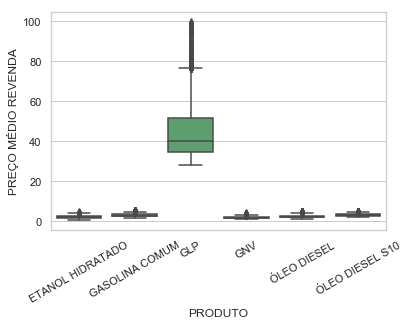

In [95]:
# use Seaborn boxplot() method to generate a boxplot
ax = sns.boxplot(x = 'PRODUTO', y = 'PREÇO MÉDIO REVENDA', data = df_gas_prices, orient = "v")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);

## 4. Caracterização de datasets <a id='caracterizacao_datasets'></a>

## 5. Visualização e discussão <a id='visualizacao_discussao'></a>

## 6. Conclusões <a id='conclusoes'></a>